In [1]:
head(cars) 

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


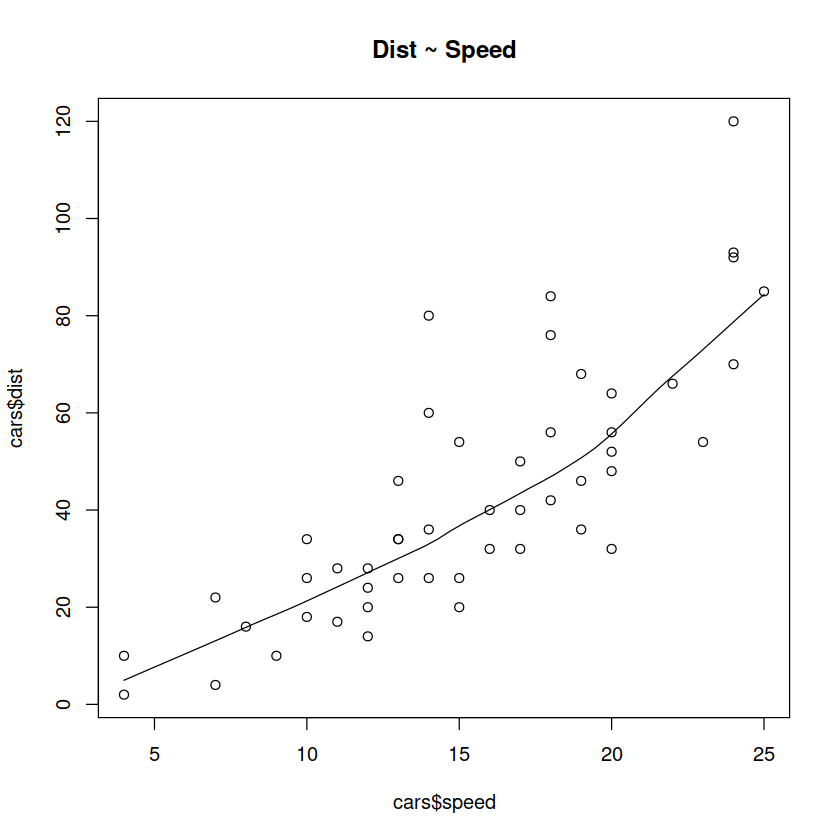

In [2]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")

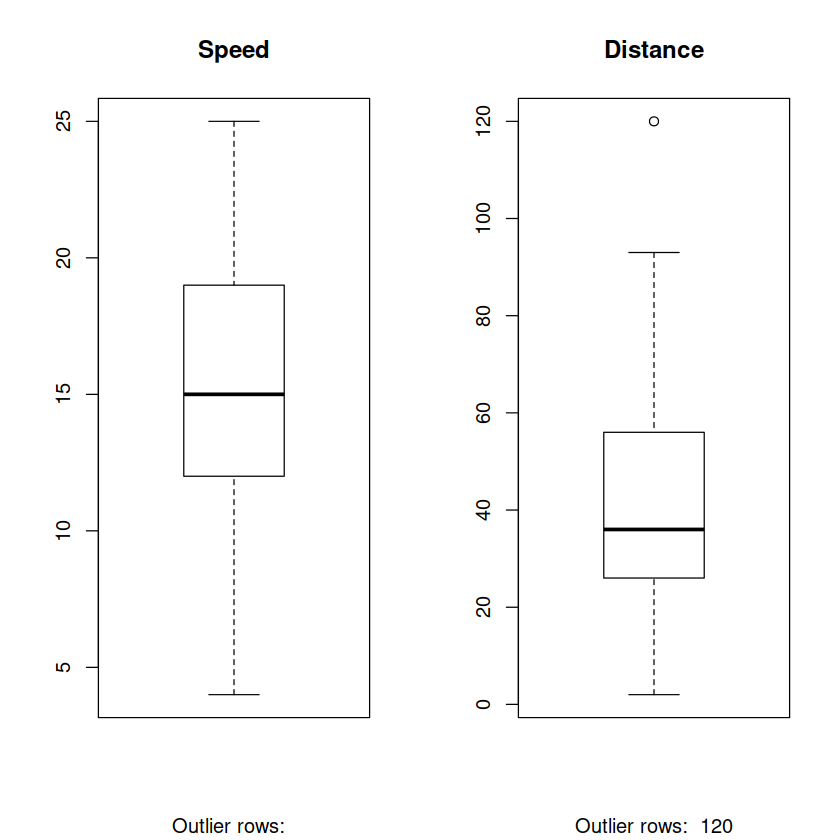

In [3]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance

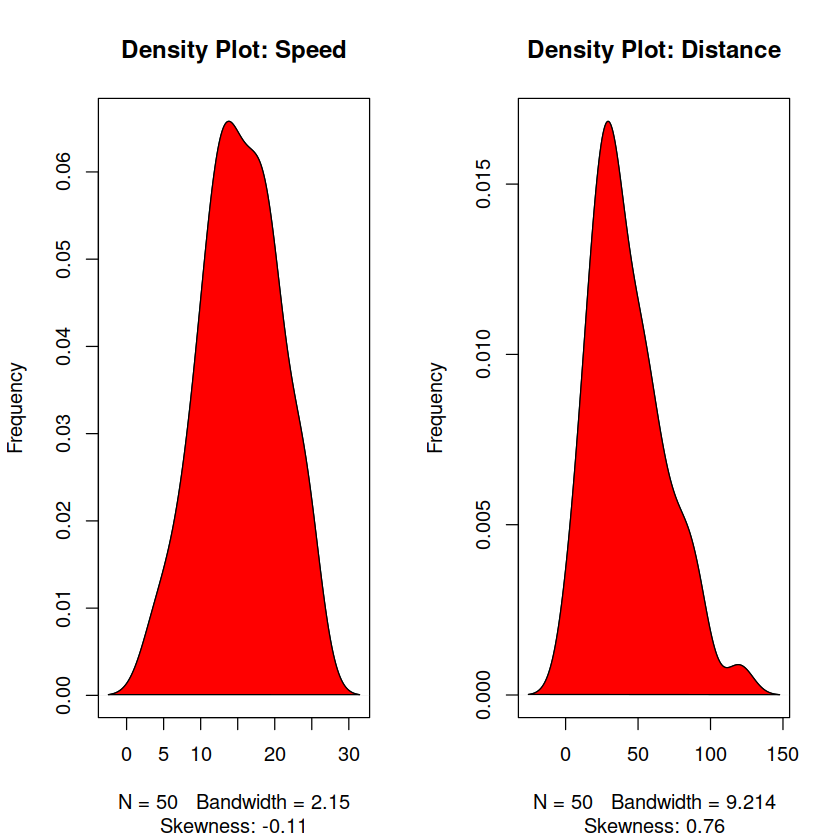

In [4]:
library(e1071)
par(mfrow=c(1, 2))  # divide graph area in 2 columns
plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))  # density plot for 'speed'
polygon(density(cars$speed), col="red")
plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))  # density plot for 'dist'
polygon(density(cars$dist), col="red")

In [5]:
cor(cars$speed, cars$dist)  # calculate correlation between speed and distance 

[1] 0.8068949

In [6]:
linearMod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



In [7]:
summary(linearMod) 


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [8]:
modelSummary <- summary(linearMod)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
beta.estimate <- modelCoeffs["speed", "Estimate"]  # get beta estimate for speed
std.error <- modelCoeffs["speed", "Std. Error"]  # get std.error for speed
t_value <- beta.estimate/std.error  # calc t statistic
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))  # calc p Value
f_statistic <- linearMod$fstatistic[1]  # fstatistic
f <- summary(linearMod)$fstatistic  # parameters for model p-value calc
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [9]:
AIC(linearMod)   
BIC(linearMod) 

[1] 419.1569

[1] 424.8929

In [10]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars))  # row indices for training data
trainingData <- cars[trainingRowIndex, ]  # model training data
testData  <- cars[-trainingRowIndex, ]   # test data

In [11]:
# Build the model on training data -
lmMod <- lm(dist ~ speed, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)  # predict distance

In [12]:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))  # make actuals_predicteds dataframe.
correlation_accuracy <- cor(actuals_preds)  # 82.7%
head(actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
3,4,9.627845
5,16,13.886057
17,34,35.177120
24,20,43.693545
28,40,47.951757
32,42,56.468182


In [13]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)  

In [14]:
min_max_accuracy

[1] 0.7311131

In [15]:
mape

[1] 0.4959096